# Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Описание данных 

### `market_file.csv`
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.\
`id` — номер покупателя в корпоративной базе данных.\
`Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
`Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».\
`Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.\
`Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.\
`Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.\
`Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.\
`Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.\
`Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.\
`Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.\
`Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.\
`Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.\
`Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

### `market_money.csv`
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.\
`id` — номер покупателя в корпоративной базе данных.\
`Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.\
`Выручка` — сумма выручки за период.

### `market_time.csv`
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.\
`id` — номер покупателя в корпоративной базе данных.\
`Период` — название периода, во время которого зафиксировано общее время.\
`минут` — значение времени, проведённого на сайте, в минутах.

### `money.csv`
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.\
`id` — номер покупателя в корпоративной базе данных.\
`Прибыль` — значение прибыли.

## Ход работы

Шаг 1. Загрузка данных\
Шаг 2. Предобработка данных\
Шаг 3. Исследовательский анализ данных\
Шаг 4. Объединение таблиц\
Шаг 5. Корреляционный анализ\
Шаг 6. Использование пайплайнов\
Шаг 7. Анализ важности признаков\
Шаг 8. Сегментация покупателей\
Шаг 9. Общий вывод

# Выполнение проекта

## Шаг 1. Загрузка данных 

In [1]:
!pip install scikit-learn==1.1.0 -q
!pip install matplotlib==3.5.1 -q
!pip install shap 
!pip install phik

In [2]:
import shap
import pandas as pd
import numpy as np
import seaborn as sn
from phik.report import plot_correlation_matrix
from phik import report

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [3]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')

In [4]:
datasets = [market_file, market_money, market_time, money]

In [5]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [6]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [7]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [8]:
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


## Шаг 2. Предобработка данных

In [9]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [10]:
report = market_file.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / market_file.shape[0]).round(2)*100
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
id,0,0.0
Покупательская активность,0,0.0
Тип сервиса,0,0.0
Разрешить сообщать,0,0.0
Маркет_актив_6_мес,0,0.0
Маркет_актив_тек_мес,0,0.0
Длительность,0,0.0
Акционные_покупки,0,0.0
Популярная_категория,0,0.0
Средний_просмотр_категорий_за_визит,0,0.0


In [11]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [12]:
report = market_money.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / market_money.shape[0]).round(2)*100
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
id,0,0.0
Период,0,0.0
Выручка,0,0.0


In [13]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [14]:
report = market_time.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / market_time.shape[0]).round(2)*100
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
id,0,0.0
Период,0,0.0
минут,0,0.0


In [15]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [16]:
report = money.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / money.shape[0]).round(2)*100
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
id,0,0.0
Прибыль,0,0.0


Пропуски в датасетах отсутствуют

In [17]:
market_money.duplicated().sum()

0

In [18]:
market_file.duplicated().sum()

0

In [19]:
market_time.duplicated().sum()

0

In [20]:
money.duplicated().sum()

0

In [21]:
market_file['Тип сервиса']=market_file['Тип сервиса'].str.replace('стандартт', 'стандарт')

In [22]:
market_file['Тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

Дубликаты были обработаны

На данном этапе была проведена предобработка данных. Удалены неявные дубликаты. Типы данных столбцов были в норме, пропуски не обнаружены

## Шаг 3. Исследовательский анализ данных

Для начала отберём покупателей, которые совершали покупки за последние три месяца

In [23]:
id_clients = market_money.loc[market_money['Выручка'] == 0, 'id'].unique()
money = money[~money['id'].isin(id_clients)]
market_money = market_money.loc[~market_money['id'].isin(id_clients), :]
market_file = market_file.loc[~market_file['id'].isin(id_clients), :]
market_time = market_time.loc[~market_time['id'].isin(id_clients), :]

Теперь приступим к исследовательскому анализу данных

In [24]:
market_file.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,215998.986893,4.254433,4.009252,602.993832,0.320547,3.267540,2.841172,4.184271,8.186584
std,374.578554,1.015618,0.696048,249.101456,0.249657,1.354623,1.973451,1.950973,3.977061
min,215349.000000,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000
25%,215675.000000,3.700000,4.000000,410.000000,0.170000,2.000000,1.000000,3.000000,5.000000
50%,215999.000000,4.200000,4.000000,607.000000,0.240000,3.000000,3.000000,4.000000,8.000000
75%,216323.000000,4.900000,4.000000,806.000000,0.300000,4.000000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000


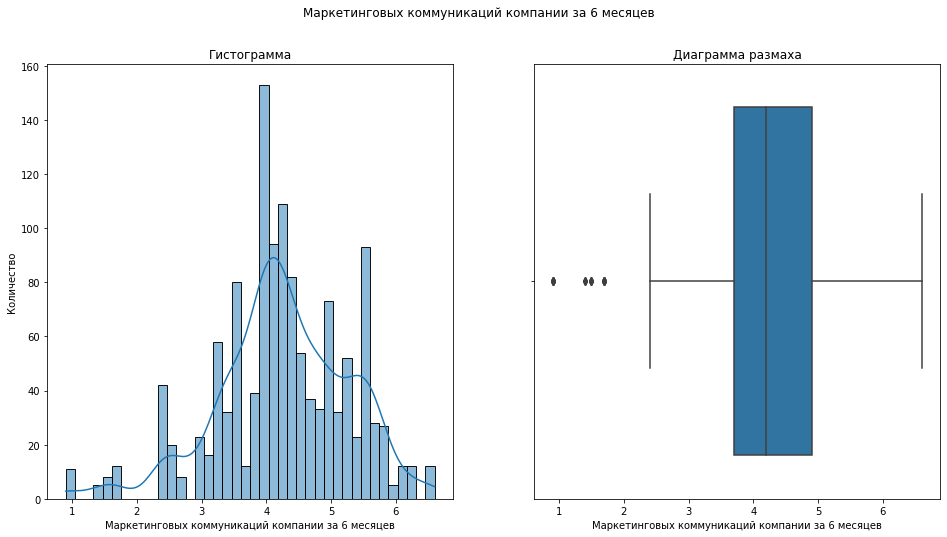

In [25]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = market_file,x = 'Маркет_актив_6_мес', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Маркетинговых коммуникаций компании за 6 месяцев')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = market_file,x = 'Маркет_актив_6_мес', ax=axs[1])
axs[1].set_xlabel('Маркетинговых коммуникаций компании за 6 месяцев')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Маркетинговых коммуникаций компании за 6 месяцев')
plt.show()

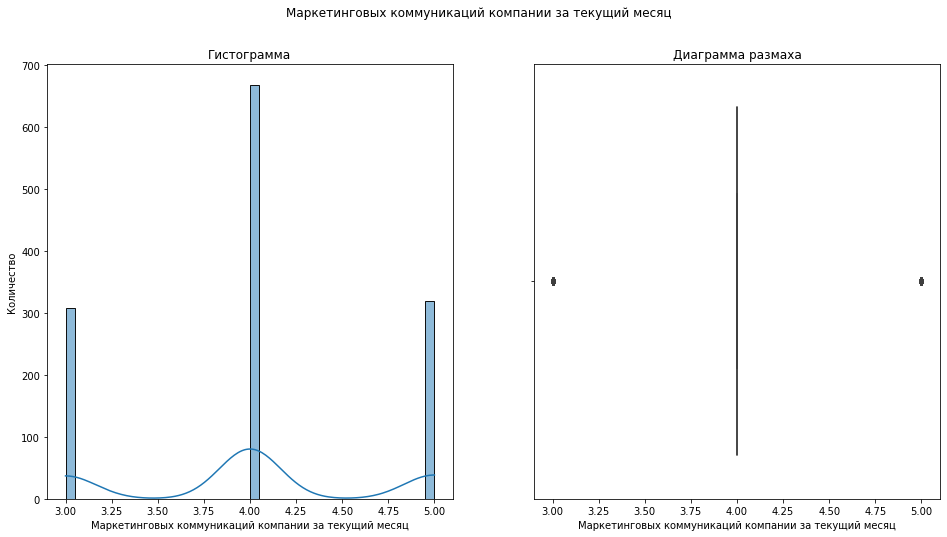

In [26]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = market_file,x = 'Маркет_актив_тек_мес', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Маркетинговых коммуникаций компании за текущий месяц')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = market_file,x = 'Маркет_актив_тек_мес', ax=axs[1])
axs[1].set_xlabel('Маркетинговых коммуникаций компании за текущий месяц')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Маркетинговых коммуникаций компании за текущий месяц')
plt.show()

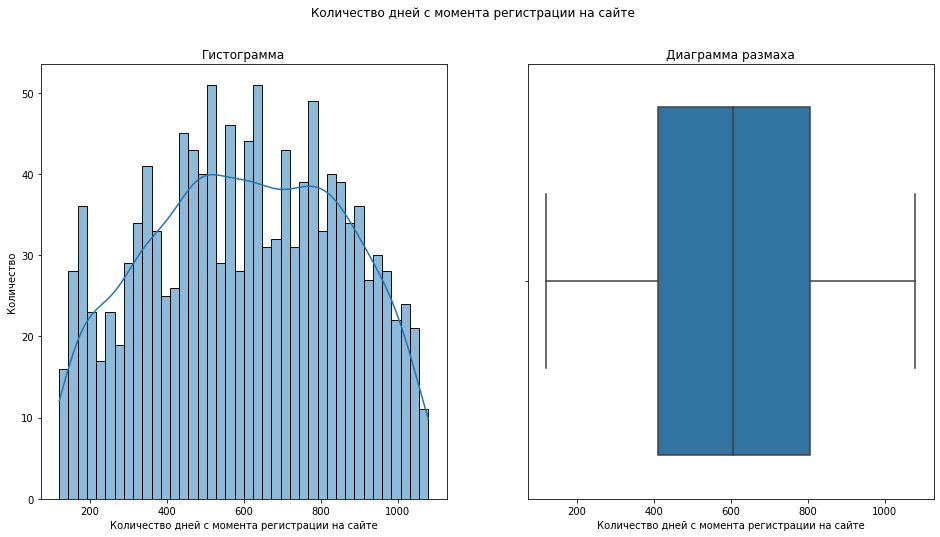

In [27]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = market_file,x = 'Длительность', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Количество дней с момента регистрации на сайте')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = market_file,x = 'Длительность', ax=axs[1])
axs[1].set_xlabel('Количество дней с момента регистрации на сайте')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Количество дней с момента регистрации на сайте')
plt.show()

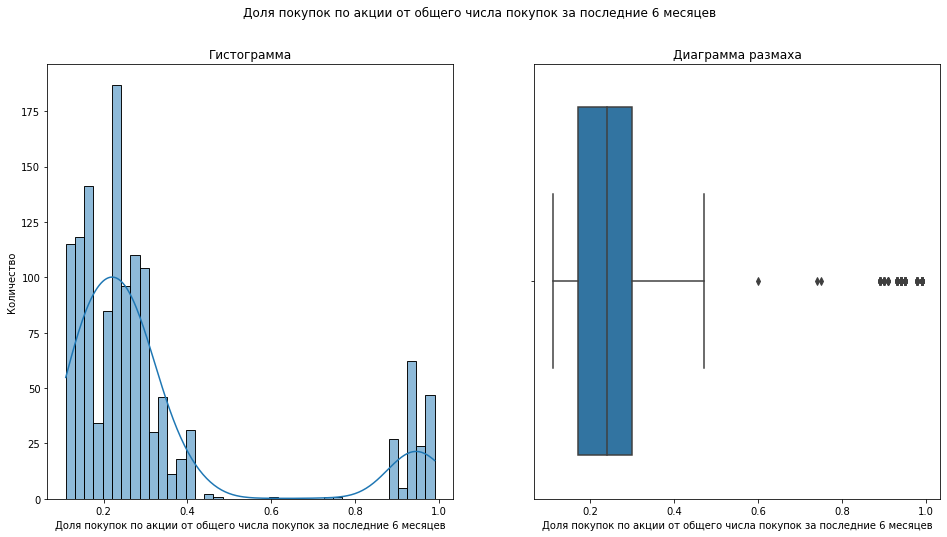

In [28]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = market_file,x = 'Акционные_покупки', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Доля покупок по акции от общего числа покупок за последние 6 месяцев')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = market_file,x = 'Акционные_покупки', ax=axs[1])
axs[1].set_xlabel('Доля покупок по акции от общего числа покупок за последние 6 месяцев')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Доля покупок по акции от общего числа покупок за последние 6 месяцев')
plt.show()

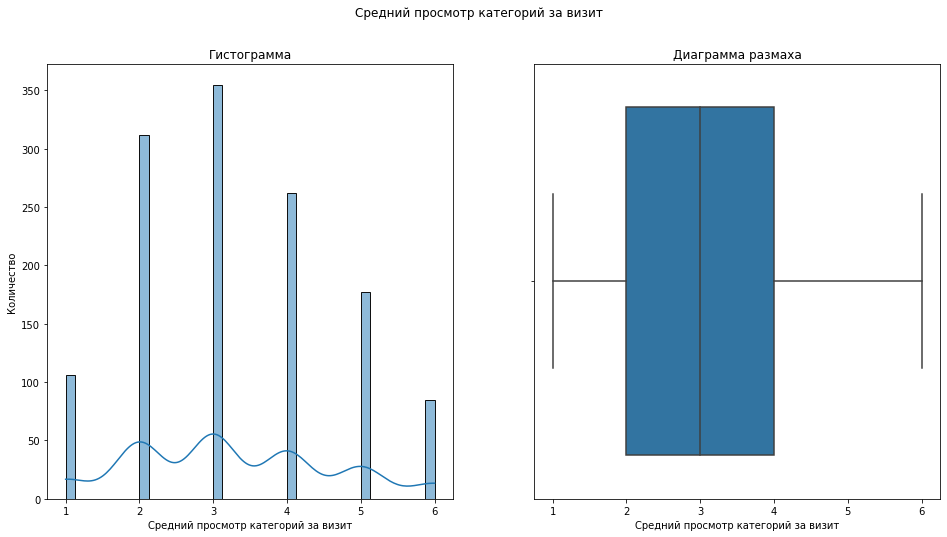

In [29]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = market_file,x = 'Средний_просмотр_категорий_за_визит', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Средний просмотр категорий за визит')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = market_file,x = 'Средний_просмотр_категорий_за_визит', ax=axs[1])
axs[1].set_xlabel('Средний просмотр категорий за визит')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Средний просмотр категорий за визит')
plt.show()

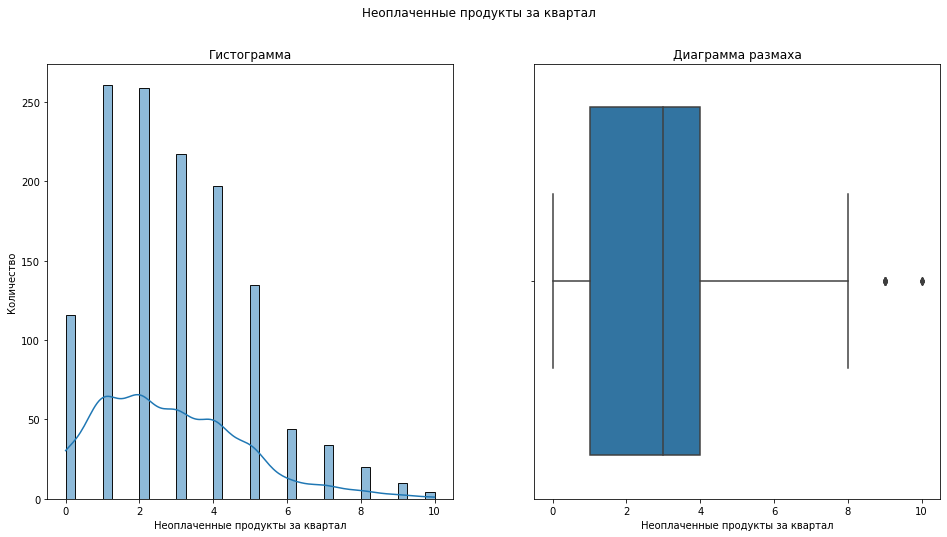

In [30]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = market_file,x = 'Неоплаченные_продукты_штук_квартал', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Неоплаченные продукты за квартал')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = market_file,x = 'Неоплаченные_продукты_штук_квартал', ax=axs[1])
axs[1].set_xlabel('Неоплаченные продукты за квартал')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Неоплаченные продукты за квартал')
plt.show()

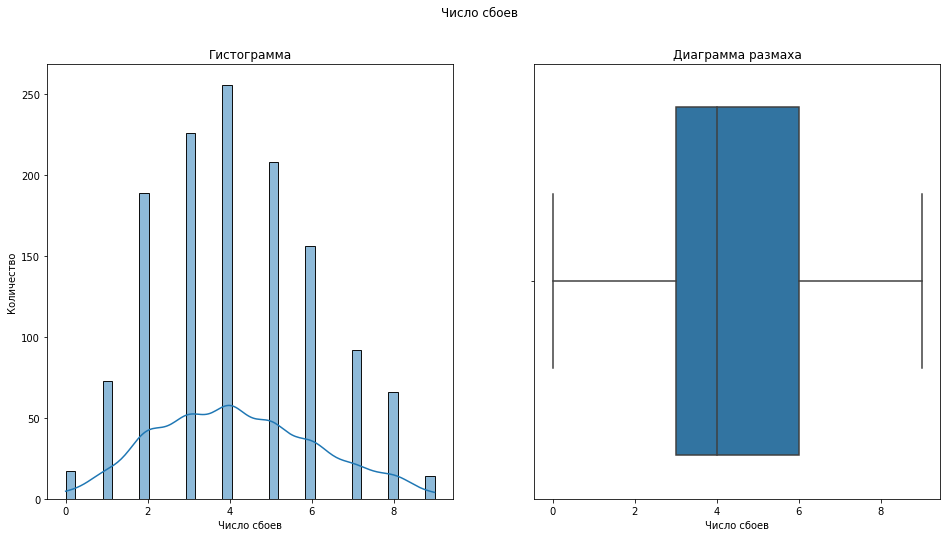

In [31]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = market_file,x = 'Ошибка_сервиса', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Число сбоев')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = market_file,x = 'Ошибка_сервиса', ax=axs[1])
axs[1].set_xlabel('Число сбоев')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Число сбоев')
plt.show()

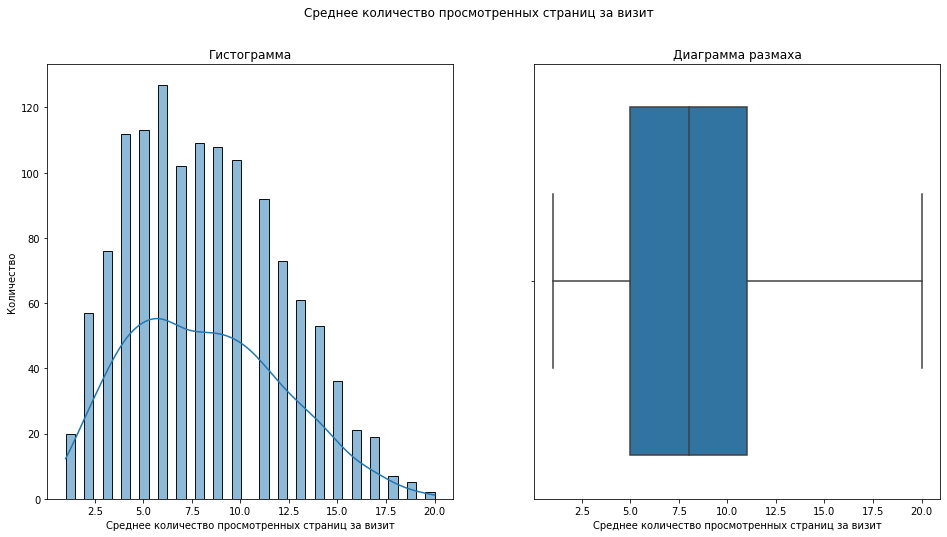

In [32]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = market_file,x = 'Страниц_за_визит', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Среднее количество просмотренных страниц за визит')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = market_file,x = 'Страниц_за_визит', ax=axs[1])
axs[1].set_xlabel('Среднее количество просмотренных страниц за визит')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Среднее количество просмотренных страниц за визит')
plt.show()

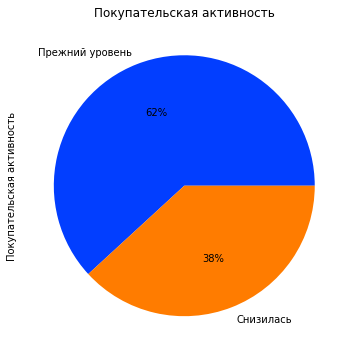

In [33]:
palette_color = sn.color_palette('bright') 
market_file['Покупательская активность'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Покупательская активность', colors = palette_color, figsize = (10, 6))
plt.show()

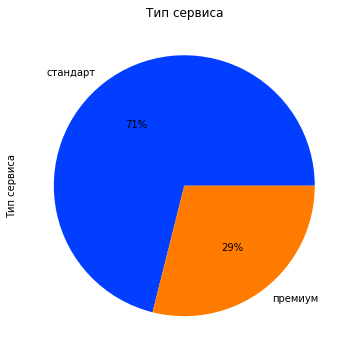

In [34]:
palette_color = sn.color_palette('bright') 
market_file['Тип сервиса'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Тип сервиса', colors = palette_color, figsize = (10, 6))
plt.show()

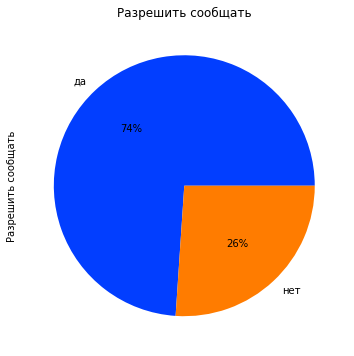

In [35]:
palette_color = sn.color_palette('bright') 
market_file['Разрешить сообщать'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Разрешить сообщать', colors = palette_color, figsize = (10, 6))
plt.show()

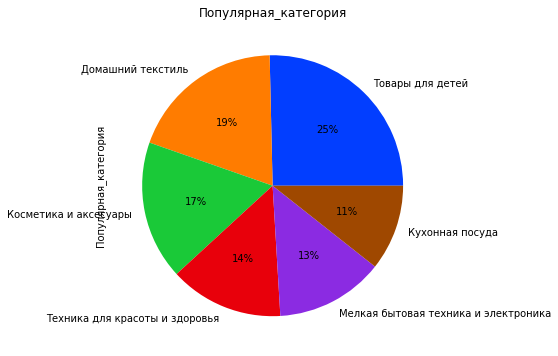

In [36]:
palette_color = sn.color_palette('bright') 
market_file['Популярная_категория'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Популярная_категория', colors = palette_color, figsize = (14, 6))
plt.show()

In [37]:
market_money.describe()

,id,Выручка
count,3891.000000,3891.000000
mean,215998.986893,5033.718890
std,374.482249,1768.471286
min,215349.000000,2758.700000
25%,215675.000000,4592.000000
50%,215999.000000,4959.000000
75%,216323.000000,5363.200000
max,216647.000000,106862.200000


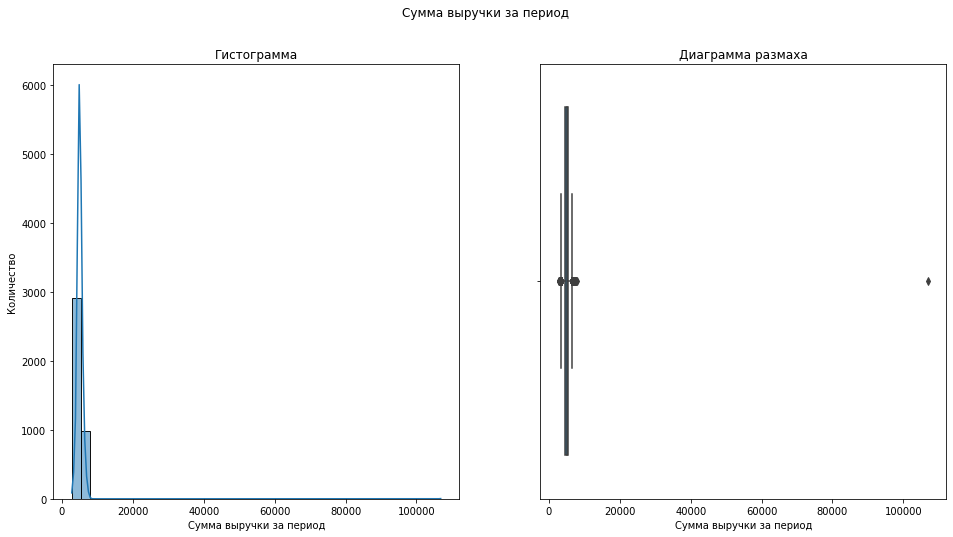

In [38]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = market_money,x = 'Выручка', ax=axs[0], bins = 40, kde = True)
axs[0].set_xlabel('Cумма выручки за период')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = market_money,x = 'Выручка', ax=axs[1])
axs[1].set_xlabel('Cумма выручки за период')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Cумма выручки за период')
plt.show()

Здесь можно заметить один выброс - одно аномально большое значение. Удалим его

In [39]:
market_money = market_money.query('Выручка < 20000')

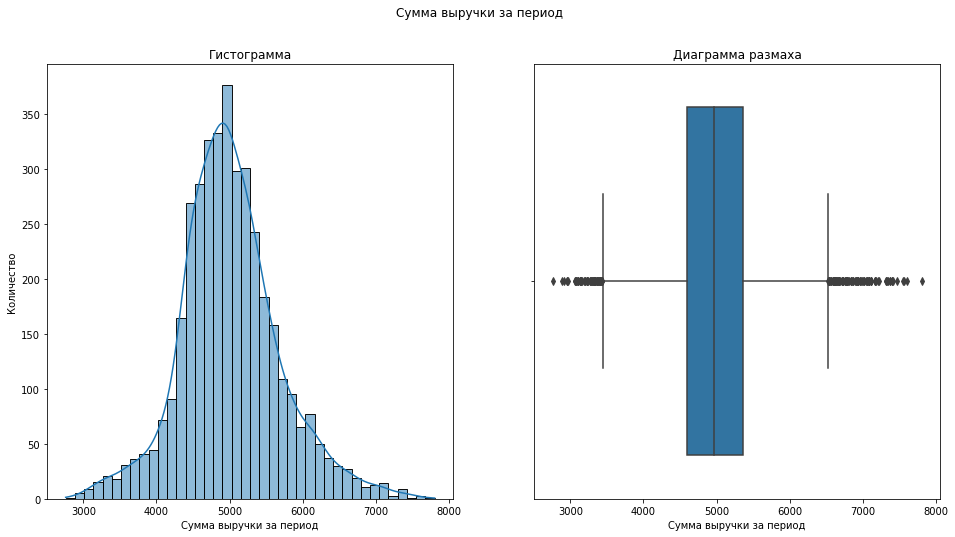

In [40]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = market_money,x = 'Выручка', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Cумма выручки за период')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = market_money,x = 'Выручка', ax=axs[1])
axs[1].set_xlabel('Cумма выручки за период')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Cумма выручки за период')
plt.show()

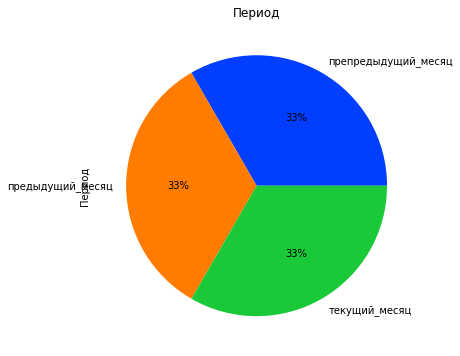

In [41]:
palette_color = sn.color_palette('bright') 
market_money['Период'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Период', colors = palette_color, figsize = (14, 6))
plt.show()

In [42]:
market_time.describe()

,id,минут
count,2594.000000,2594.000000
mean,215998.986893,13.340401
std,374.506318,4.081999
min,215349.000000,4.000000
25%,215675.000000,10.000000
50%,215999.000000,13.000000
75%,216323.000000,16.000000
max,216647.000000,23.000000


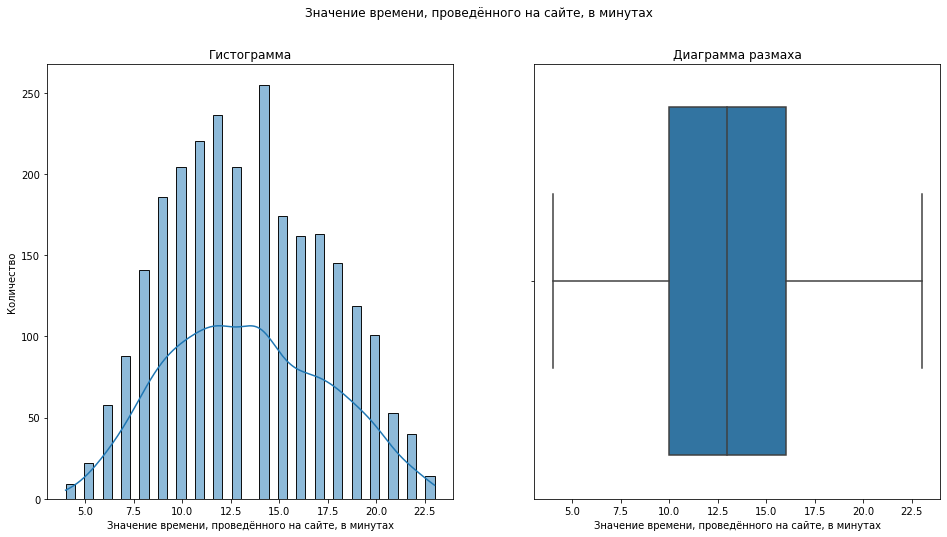

In [43]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = market_time,x = 'минут', ax=axs[0], bins = 40, kde = True)
axs[0].set_xlabel('Значение времени, проведённого на сайте, в минутах')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = market_time,x = 'минут', ax=axs[1])
axs[1].set_xlabel('Значение времени, проведённого на сайте, в минутах')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Значение времени, проведённого на сайте, в минутах')
plt.show()

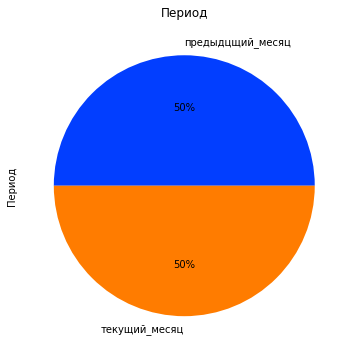

In [44]:
palette_color = sn.color_palette('bright') 
market_time['Период'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Период', colors = palette_color, figsize = (14, 6))
plt.show()

In [45]:
money.describe()

,id,Прибыль
count,1297.000000,1297.000000
mean,215998.986893,3.997610
std,374.578554,1.010813
min,215349.000000,0.860000
25%,215675.000000,3.300000
50%,215999.000000,4.040000
75%,216323.000000,4.670000
max,216647.000000,7.430000


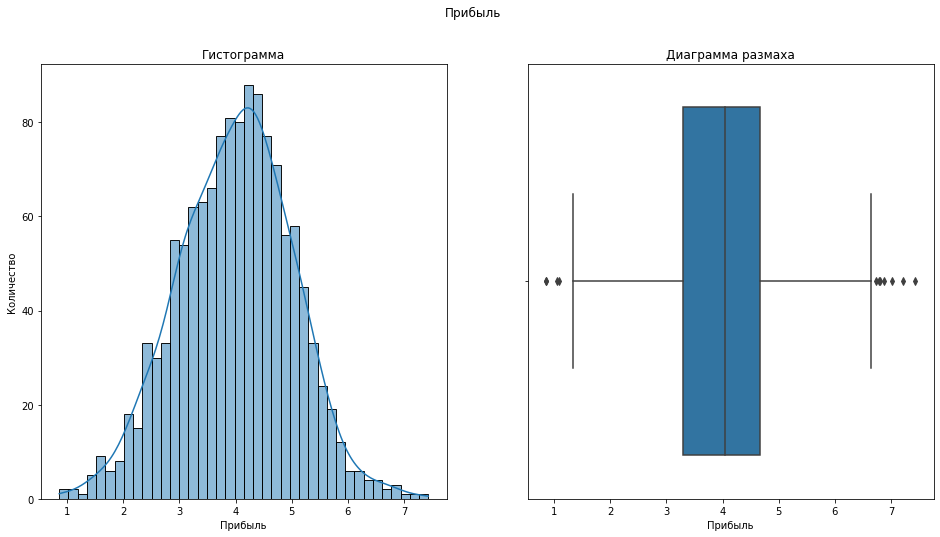

In [46]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = money,x = 'Прибыль', ax=axs[0], bins = 40, kde = True)
axs[0].set_xlabel('Прибыль')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = money,x = 'Прибыль', ax=axs[1])
axs[1].set_xlabel('Прибыль')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Прибыль')
plt.show()

В рамках данного этапа были построены графики для всех количественных и категориальных признаков для каждого из датасетов. Были проанализированы минимальные, максимальные, средние и медианные значения для каждого из количественных признаков, изучено соотношение для категориальных признаков. Был обнаужен один выброс, после чего он был удалён.

## Шаг 4. Объединение таблиц

In [47]:
transformed_market_monet = market_money.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='first').reset_index()
transformed_market_monet.columns.name = None  # Убираем имя столбца 

In [48]:
transformed_market_monet = transformed_market_monet.rename(columns={'id': 'id', 'предыдущий_месяц': 'выручка_предыдущий_месяц', 'препредыдущий_месяц': 'выручка_препредыдущий_месяц', 'текущий_месяц': 'выручка_текущий_месяц'})

In [49]:
transformed_market_monet.head()

,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


In [50]:
transformed_market_time = market_time.pivot_table(index='id', columns='Период', values='минут', aggfunc='first').reset_index()
transformed_market_time.columns.name = None  # Убираем имя столбца 
transformed_market_time = transformed_market_time.rename(columns={'id': 'id', 'предыдцщий_месяц': 'минуты_предыдущий_месяц', 'текущий_месяц': 'минуты_текущий_месяц'})

In [51]:
data = pd.merge(market_file, pd.merge(transformed_market_monet, transformed_market_time, left_index=True, right_index=True), left_index=True, right_index=True).drop(['id_x','id_y'], axis = 1)

In [52]:
data = data.dropna()

In [53]:
data.set_index('id', inplace=True)

In [54]:
data.shape

(1293, 17)

## Шаг 5. Корреляционный анализ

In [55]:
data.phik_matrix().style.background_gradient(cmap ='coolwarm')

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц']


,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц
Покупательская активность,1.000000,0.133947,0.000000,0.546667,0.000000,0.101688,0.508749,0.296462,0.538282,0.504919,0.224359,0.748034,0.218547,0.494088,0.199914,0.678624,0.576983
Тип сервиса,0.133947,1.000000,0.287070,0.091816,0.045743,0.399642,0.028671,0.068967,0.188847,0.119440,0.077002,0.099231,0.000000,0.066674,0.041526,0.066338,0.000000
Разрешить сообщать,0.000000,0.287070,1.000000,0.000000,0.052224,0.253308,0.018698,0.071661,0.070284,0.193532,0.000000,0.037603,0.083521,0.000000,0.059542,0.000000,0.000000
Маркет_актив_6_мес,0.546667,0.091816,0.000000,1.000000,0.074465,0.000000,0.278634,0.148968,0.206089,0.285321,0.145096,0.395250,0.166571,0.294074,0.000000,0.300087,0.280988
Маркет_актив_тек_мес,0.000000,0.045743,0.052224,0.074465,1.000000,0.178117,0.000000,0.131856,0.246042,0.145934,0.118621,0.000000,0.090598,0.000000,0.000000,0.042043,0.019565
Длительность,0.101688,0.399642,0.253308,0.000000,0.178117,1.000000,0.000000,0.000000,0.186287,0.197087,0.175944,0.122225,0.000000,0.124547,0.000000,0.000000,0.119919
Акционные_покупки,0.508749,0.028671,0.018698,0.278634,0.000000,0.000000,1.000000,0.121864,0.200593,0.237492,0.000000,0.311768,0.083473,0.211851,0.057561,0.286099,0.252952
Популярная_категория,0.296462,0.068967,0.071661,0.148968,0.131856,0.000000,0.121864,1.000000,0.228356,0.250534,0.000000,0.160515,0.068554,0.101922,0.038407,0.114877,0.051610
Средний_просмотр_категорий_за_визит,0.538282,0.188847,0.070284,0.206089,0.246042,0.186287,0.200593,0.228356,1.000000,0.325531,0.070883,0.261289,0.098123,0.185415,0.064942,0.205158,0.152005
Неоплаченные_продукты_штук_квартал,0.504919,0.119440,0.193532,0.285321,0.145934,0.197087,0.237492,0.250534,0.325531,1.000000,0.040924,0.363741,0.143662,0.214427,0.159365,0.287784,0.223591


Признаки `выручка_текущий_месяц` и `выручка_предыдущий_месяц` - мультиколлинеарны. Однако, мультиколлинеарность не с целевым признаком, не превышает значение 0.9, да и есть модели, которые к ней не чувствительны, так что оставим всё, как есть

## Шаг 6. Использование пайплайнов

In [56]:
ohe_columns = ['Разрешить сообщать', 'Популярная_категория']
ord_columns = ['Тип сервиса']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'выручка_препредыдущий_месяц','выручка_предыдущий_месяц','выручка_текущий_месяц' ,'минуты_предыдущий_месяц', 'минуты_текущий_месяц']
RANDOM_STATE = 42

y = data['Покупательская активность']
X = data.drop(['Покупательская активность'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE
) 

In [57]:
label_encoder = LabelEncoder()

In [58]:
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [59]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse =False)
        )
    ]
) 

In [60]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='error'
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

In [61]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

In [62]:
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [63]:
param_distributions = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
    },
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'models__max_features': range(2, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__C': range(1, 10),
        'models__kernel': ['rbf', 'linear', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
] 

In [64]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions, 
    scoring='roc_auc', 
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False))]),
                                                                               ['Разрешить '
                                                                                'сообщать',
                                                                                'Популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord...
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 10),
                                         'models__kernel': ['rbf', 'linear',
                                                            'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=42)],
                                         'models__C': range(1, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

Мною было решено использовать метрику `roc-auc` так как она обладает некоторыми преимуществами:
1) Устойчивость к несбалансированным классам\
2) Независимость от порога классификации\
3) ROC-кривая позволяет визуализировать качество модели и сравнивать ее с другими моделями

In [65]:
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_...
                                                   'Маркет_актив_тек_мес',
                                                   'Длительность',
                                                   'Акционные_покупки',
                                                   'Средний_просмотр_категорий_за_визит',
                                                   'Неоплаченные_продукты_штук_квартал',
                                                   'Ошибка_сервиса',
                                                   'Страниц_за_визит',
                                                   'выручка_препредыдущий_месяц',
                                                   'выручка_предыдущий_месяц',
                                                   'выручка_текущий_месяц',
                                                   'минуты_предыдущий_месяц',
                                                   'минуты_текущий_месяц'])])),
                ('models', KNeighborsClassifier(n_neighbors=17))])

In [66]:
randomized_search.best_score_

0.8723784808809716

In [67]:
y_predict = randomized_search.predict(X_test)
y_predict_proba = randomized_search.predict_proba(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [68]:
roc_auc_score(y_test, y_predict_proba[:, 1])

0.8838183421516755

Лучшая модель - `KNeighborsClassifier(n_neighbors=17)`, значение метрики `roc_auc` - 0.88

## Шаг 7. Анализ важности признаков

In [69]:
shap.initjs()
best_model = randomized_search.best_estimator_
X_train_shap = pd.DataFrame(
    pipe_final.named_steps['preprocessor'].fit_transform(X_train), 
    columns= pipe_final.named_steps['preprocessor'].get_feature_names_out()
)
X_test_shap = pd.DataFrame(
    pipe_final.named_steps['preprocessor'].transform(X_test), 
    columns= pipe_final.named_steps['preprocessor'].get_feature_names_out()
)
model = KNeighborsClassifier(n_neighbors=17)
model.fit(X_train_shap, y_train)
explainer = shap.KernelExplainer(model.predict_proba, X_train_shap[:10])
shap_values = explainer(X_test_shap[:10])

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


  0%|          | 0/10 [00:00<?, ?it/s]

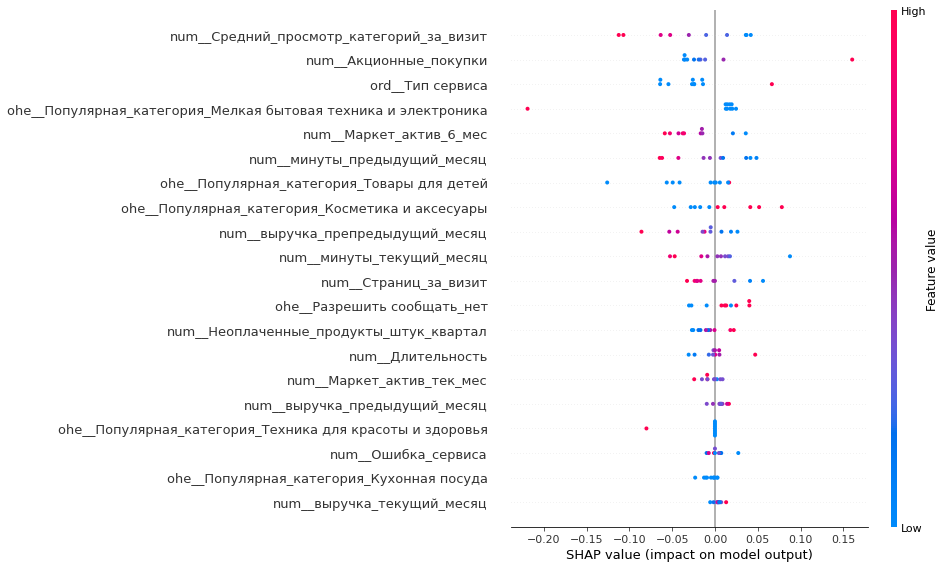

In [70]:
shap.plots.beeswarm(shap_values[:,:,1], max_display = 21) 

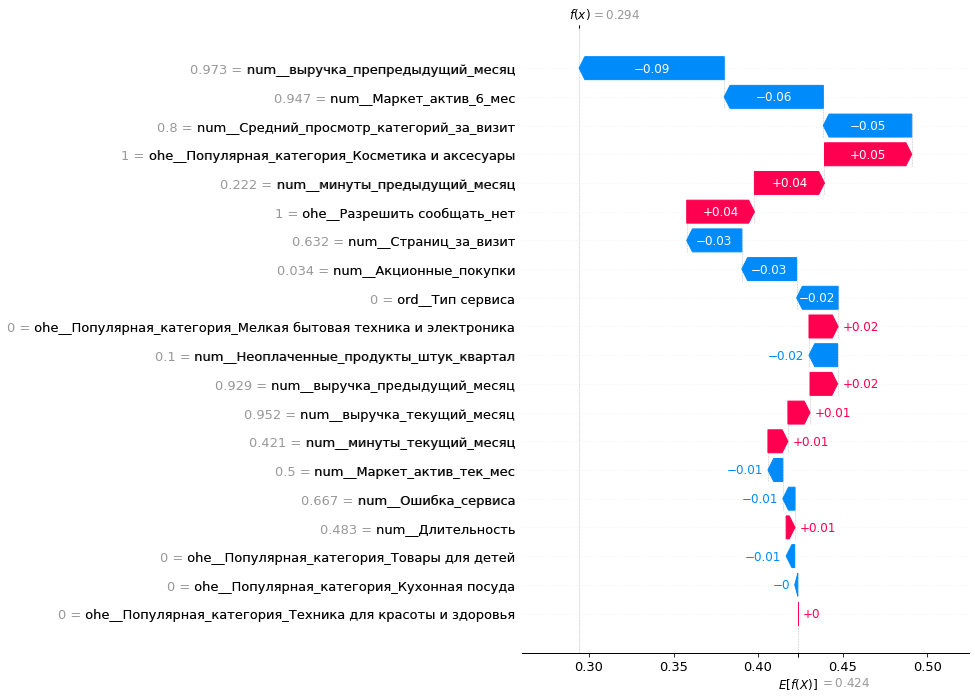

In [71]:
shap.plots.waterfall(shap_values[1,:,1], max_display = 21)

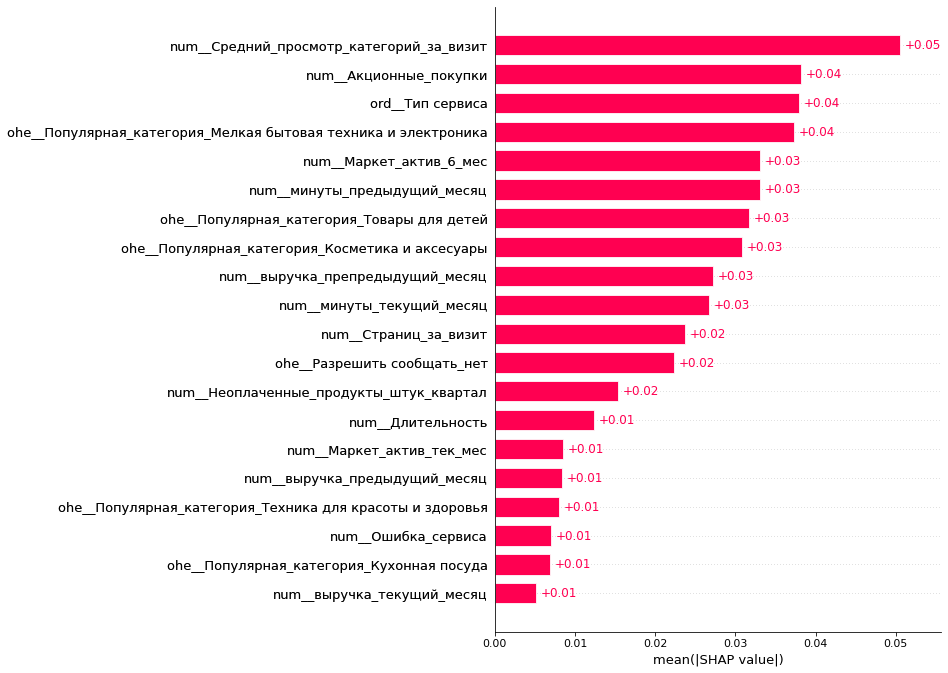

In [72]:
shap.plots.bar(shap_values[:,:,1], max_display = 21)

**Выводы:**
1) Малозначимые признаки:\
    - Популярные категории (не считая бытовой техники и аксессуаров)\
    - Выручка в текущем месяце\
    - Ошибка сервиса\
 \
2) Наиболее значимые признаки:\
    - Средний просмотр категорий за визит\
    - Акционные покупки\
    - Тип сервиса\
\
**При моделировании и принятии бизнесс-решений:**
- Компании следует обратить внимание на то, что акционные покупки сильно влияют на результат, так что, возможно следует устраивать больше акций.
- Тип сервиса тоже сильно влияет, так что возможно стоит давать больше каких-то бонусы тем, кто пользуется премиумом
- Средний просмотр категорий за визит - наиболее важный признак. Компании стоит обратить на это внимание, анализировать поведение пользователей и за тем персонализировать их предложения.

## Шаг 8. Сегментация покупателей

In [73]:
predicted = randomized_search.predict_proba(X_test)[:, 1]
X_test['predicted'] = predicted
X_test.reset_index(inplace=True)
segment = X_test.merge(money, on = 'id')

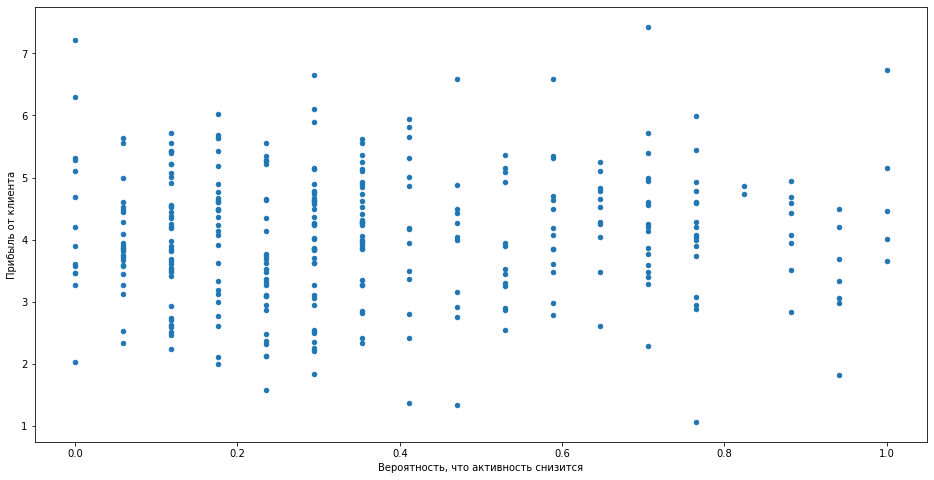

In [74]:
segment.plot.scatter(x = 'predicted', y = 'Прибыль', figsize=(16, 8))
plt.xlabel('Вероятность, что активность снизится')
plt.ylabel('Прибыль от клиента')
plt.show()

Рассмотрим только клиентов у которых высока вероятность, что их активность снизится, но при этом их прибыль больше средней

In [75]:
segment = segment[(segment['predicted'] >= 0.6) & (segment['Прибыль'] >= segment['Прибыль'].mean())]

In [76]:
segment.drop('id', axis = 1).phik_matrix().style.background_gradient(cmap ='coolwarm')

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'predicted', 'Прибыль']


,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц,predicted,Прибыль
Тип сервиса,1.000000,0.077364,0.000000,0.000000,0.455415,0.266428,0.399305,0.000000,0.169482,0.571088,0.496101,0.000000,0.103235,0.000000,0.000000,0.172048,0.233960,0.000000
Разрешить сообщать,0.077364,1.000000,0.000000,0.273760,0.386279,0.274619,0.000000,0.231287,0.216632,0.000000,0.000000,0.000000,0.175762,0.383995,0.066646,0.506814,0.223711,0.000000
Маркет_актив_6_мес,0.000000,0.000000,1.000000,0.000000,0.456645,0.513654,0.000000,0.387700,0.399360,0.000000,0.000000,0.499590,0.572833,0.506036,0.413090,0.461150,0.000000,0.198038
Маркет_актив_тек_мес,0.000000,0.273760,0.000000,1.000000,0.000000,0.297023,0.090042,0.446415,0.213893,0.000000,0.264944,0.000000,0.000000,0.283663,0.560033,0.427934,0.272107,0.000000
Длительность,0.455415,0.386279,0.456645,0.000000,1.000000,0.374533,0.694473,0.000000,0.000000,0.000000,0.434443,0.000000,0.000000,0.000000,0.483918,0.233712,0.353552,0.280121
Акционные_покупки,0.266428,0.274619,0.513654,0.297023,0.374533,1.000000,0.263594,0.303620,0.000000,0.387063,0.000000,0.378566,0.372750,0.000000,0.593096,0.000000,0.352726,0.000000
Популярная_категория,0.399305,0.000000,0.000000,0.090042,0.694473,0.263594,1.000000,0.000000,0.585934,0.000000,0.268958,0.000000,0.343675,0.540540,0.000000,0.578775,0.000000,0.411457
Средний_просмотр_категорий_за_визит,0.000000,0.231287,0.387700,0.446415,0.000000,0.303620,0.000000,1.000000,0.063238,0.000000,0.109083,0.078319,0.165278,0.324460,0.475220,0.413417,0.180015,0.000000
Неоплаченные_продукты_штук_квартал,0.169482,0.216632,0.399360,0.213893,0.000000,0.000000,0.585934,0.063238,1.000000,0.000000,0.097833,0.394713,0.000000,0.000000,0.000000,0.533940,0.000000,0.000000
Ошибка_сервиса,0.571088,0.000000,0.000000,0.000000,0.000000,0.387063,0.000000,0.000000,0.000000,1.000000,0.087755,0.000000,0.119477,0.000000,0.517328,0.000000,0.000000,0.000000


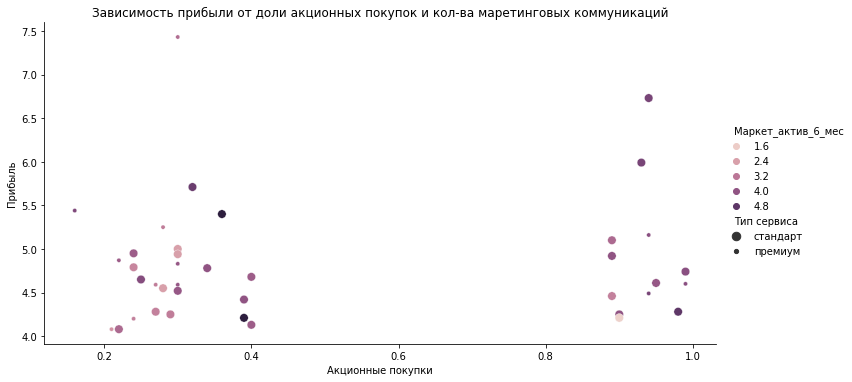

In [77]:
sn.relplot(data = segment, x = 'Акционные_покупки', y ='Прибыль', hue = 'Маркет_актив_6_мес', size = 'Тип сервиса', aspect = 2)
plt.title('Зависимость прибыли от доли акционных покупок и кол-ва маретинговых коммуникаций')
plt.xlabel('Акционные покупки')
plt.ylabel('Прибыль')
plt.show()

In [78]:
segment.pivot_table(index = ['Страниц_за_визит', 'Тип сервиса'])

id  predicted  Акционные_покупки  \
Страниц_за_визит Тип сервиса                                                
1                стандарт     215488.666667   0.784314           0.526667   
2                премиум      215609.000000   0.941176           0.590000   
                 стандарт     215605.375000   0.808824           0.456250   
3                стандарт     215577.600000   0.729412           0.586000   
4                премиум      215401.000000   0.705882           0.300000   
                 стандарт     215609.500000   0.750000           0.577500   
5                премиум      215585.000000   0.764706           0.300000   
                 стандарт     215657.333333   0.686275           0.546667   
6                премиум      215556.666667   0.803922           0.736667   
                 стандарт     215457.250000   0.720588           0.610000   
7                премиум      215661.666667   0.823529           0.233333   
9                премиум      216549.000000   0.764706           0.160000   
14               премиум      216318.000000   0.647059           0.300000   

                              Длительность  Маркет_актив_6_мес  \
Страниц_за_визит Тип сервиса                                     
1                стандарт       533.000000            4.166667   
2                премиум        388.500000            3.700000   
                 стандарт       460.125000            3.662500   
3                стандарт       654.800000            4.140000   
4                премиум        339.000000            3.400000   
                 стандарт       647.750000            3.150000   
5                премиум       1044.000000            3.900000   
                 стандарт       659.666667            3.600000   
6                премиум        747.333333            3.766667   
                 стандарт       514.000000            3.675000   
7                премиум        905.000000            3.166667   
9                премиум        820.000000            4.300000   
14               премиум       1040.000000            3.900000   

                              Маркет_актив_тек_мес  \
Страниц_за_визит Тип сервиса                         
1                стандарт                 3.333333   
2                премиум                  4.000000   
                 стандарт                 4.625000   
3                стандарт                 4.200000   
4                премиум                  5.000000   
                 стандарт                 3.750000   
5                премиум                  4.000000   
                 стандарт                 3.333333   
6                премиум                  4.000000   
                 стандарт                 4.000000   
7                премиум                  3.666667   
9                премиум                  3.000000   
14               премиум                  5.000000   

                              Неоплаченные_продукты_штук_квартал  \
Страниц_за_визит Тип сервиса                                       
1                стандарт                               5.000000   
2                премиум                                8.500000   
                 стандарт                               3.625000   
3                стандарт                               4.000000   
4                премиум                                3.000000   
                 стандарт                               3.500000   
5                премиум                                5.000000   
                 стандарт                               6.666667   
6                премиум                                4.333333   
                 стандарт                               4.500000   
7                премиум                                3.666667   
9                премиум                                4.000000   
14               премиум                                3.000000   

                              Ошибка_сервиса   Прибыль  \
Стра

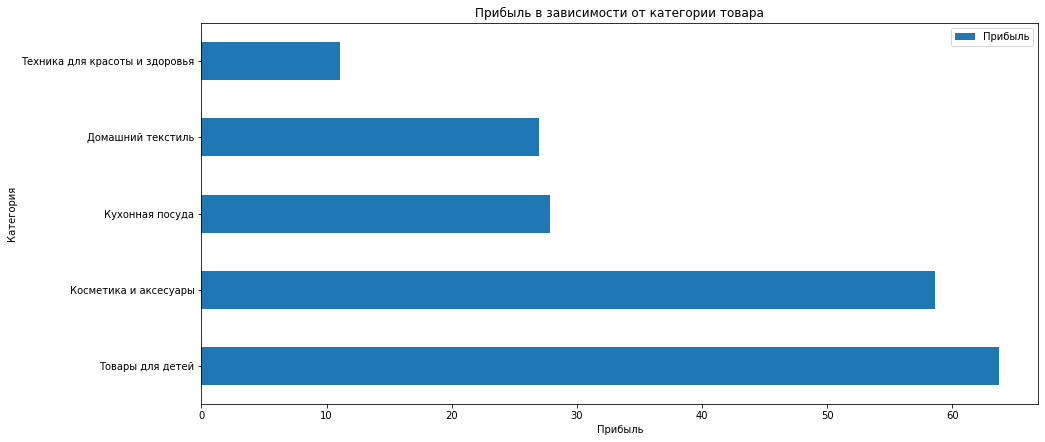

In [79]:
segment.groupby('Популярная_категория')['Прибыль'].sum().sort_values(ascending = False).plot(kind = 'barh', legend = True, figsize = (15, 7))
plt.title('Прибыль в зависимости от категории товара')
plt.ylabel('Категория')
plt.xlabel('Прибыль')
plt.show()

In [80]:
segment.pivot_table(index = 'Популярная_категория')

,id,predicted,Акционные_покупки,Длительность,Маркет_актив_6_мес,Маркет_актив_тек_мес,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Прибыль,Средний_просмотр_категорий_за_визит,Страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц
Популярная_категория,,,,,,,,,,,,,,,,
Домашний текстиль,215544.500000,0.725490,0.473333,481.333333,3.716667,3.666667,5.500000,4.166667,4.495000,1.833333,3.333333,4690.166667,4540.166667,4965.550000,11.333333,12.166667
Косметика и аксесуары,215748.333333,0.754902,0.429167,739.666667,3.450000,3.916667,3.333333,3.833333,4.880833,2.333333,5.916667,4848.833333,4620.000000,5399.708333,9.833333,10.000000
Кухонная посуда,215573.166667,0.803922,0.533333,750.333333,3.550000,4.000000,6.166667,4.166667,4.640000,2.333333,4.333333,5187.500000,4448.500000,5618.450000,7.333333,8.333333
Техника для красоты и здоровья,215655.500000,0.705882,0.910000,656.000000,3.950000,4.000000,8.000000,3.000000,5.545000,2.500000,3.500000,5144.750000,4376.000000,5608.200000,9.500000,7.500000
Товары для детей,215551.153846,0.800905,0.514615,506.076923,3.953846,4.307692,3.538462,3.769231,4.899231,2.307692,3.076923,5075.192308,4634.923077,5504.792308,8.769231,9.076923


Рассмотрим данный сегмент покупателей (он был выбран так как имеет большую прибыль, но при этом клиенты собираются уйти, т.е это потенциальная потеря большого количества средств для бизнеса). Рекомендации, которую можно дать бизнесу:

- Клиенты премиум-класса почти не используют акционные предложения, возможно стоит их как-то видоизменить, персонализировать, чтобы сделать их более популярными в этой группе
- Прибыль и удержание клиентов не сильно зависит от маркет. активности, а значит нужно сосредоточить своё внимание на более важных вещах
- Наиболее популярные категории товаров - "Товары для детей" и "Косметика и аксессуары". Но при этом доли акционных покупок там одни из самых низких. Для удержание клиентов этих категорий стоит добавить акций/персональных предложений.
- Пользователи, посещающие мало страниц за визит, имеют одни из самых наибольших вероятностей, на снижение своей активности. Необходимо придумать что-нибудь, для их дальнейшего удержания, например систему рекомендаций товаров.

## Шаг 9. Итоговый вывод

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений. «В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. Перед нами стояла задача разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.\
Данные были проверены на дубликаты и пропуски. Был один неявный дубликат - он был устранён. Пропусков в датасетах не было. На стадии исследовательского анализа данных был удалён один выброс.\
Для поиска лучшей модели был написан пайплайн, в котором перебирались способы масштабирования данных, модели и гиперпараметры к ним. По итогу лучшей моделью оказалась - KNeighborsClassifier(n_neighbors=17).\
**При моделировании и принятии бизнесс-решений:**
- Компании следует обратить внимание на то, что акционные покупки сильно влияют на результат, так что, возможно следует устраивать больше акций.
- Тип сервиса тоже сильно влияет, так что возможно стоит давать больше каких-то бонусы тем, кто пользуется премиумом
- Средний просмотр категорий за визит - наиболее важный признак. Компании стоит обратить на это внимание, анализировать поведение пользователей и за тем персонализировать их предложения.

Также, для сегмента покупателей с высокой прибылью и высокой вероятностью снижения покупательской способности был проведён дополнительный анализ. Рекомендации, которую можно дать бизнесу:
- Клиенты премиум-класса почти не используют акционные предложения, возможно стоит их как-то видоизменить, персонализировать, чтобы сделать их более популярными в этой группе
- Прибыль и удержание клиентов не сильно зависит от маркет. активности, а значит нужно сосредоточить своё внимание на более важных вещах
- Наиболее популярные категории товаров - "Товары для детей" и "Косметика и аксессуары". Но при этом доли акционных покупок там одни из самых низких. Для удержание клиентов этих категорий стоит добавить акций/персональных предложений.
- Пользователи, посещающие мало страниц за визит, имеют одни из самых наибольших вероятностей, на снижение своей активности. Необходимо придумать что-нибудь, для их дальнейшего удержания, например систему рекомендаций товаров.
